Text(0.5, 0.92, 'True Labels')

<Figure size 432x288 with 0 Axes>

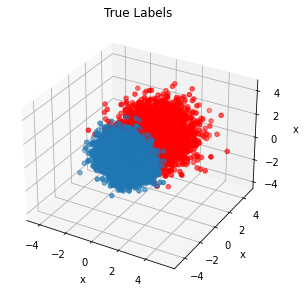

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt #General Plotting
from matplotlib import cm

import numpy as np

from scipy.stats import multivariate_normal

# Set seed to generate reproducible "pseudo-randomness" (handles scipy's "randomness" too)
np.random.seed(1)

# Number of samples to draw from each distribution
N = 10000

p0 = 0.65 # P(L=0)
p1 = 0.35 # P(L=1)

N0=0
N1=0


for i in range(0,N):
    if np.random.random() < p0:
        N0= N0 + 1
    else:
        N1 = N1 + 1

# mu and sigma values for the data distribution 0
mu0 = np.transpose(np.array([-1/2, -1/2, -1/2]))
sigma0 = np.array([[1,-0.5,0.3],[-0.5,1,-0.5],[0.3, -0.5, 1]])

# generates data from data distribution 0 and adds it to the scatter plot
r0 = np.random.multivariate_normal(mu0,sigma0,N0)

plt.clf()
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(131, projection = '3d')
plt.xlabel("x")
plt.ylabel("y")
plt.ylabel("z")
plt.title("Full Covariance Matrix")
fig = plt.figure(0)

ax1.scatter(r0[:,0],r0[:,1],r0[:,2])

# mu and sigma values for the data distribution 1
mu1 = np.transpose(np.array([1, 1, 1]))
sigma1 = np.array([[1, 0.3, -0.2],[0.3, 1, 0.3],[-0.2, 0.3, 1]])

# generates data from data distribution 1 and adds it to the scatter plot
r1 = np.random.multivariate_normal(mu1, sigma1, N1)
ax1.scatter(r1[:,0],r1[:,1],r1[:,2],c='r')
ax1.set_xlabel("x")
ax1.set_ylabel("x")
ax1.set_zlabel("x")

ax1.set_title('True Labels')



In [ ]:
N0_discriminant  =[]
N1_discriminant =[]
# calculates discr imi nanscor esforalld atapoints in eac h d ata distrib ution
for j in range(0, N0):
    N0_discriminant.append(multivariate_normal.pdf(r0[j], mu1, sigma1)/multivariate_normal)
for j in range(0, N1):
    N1_discriminant.append(multivariate_normal.pdf(r1[j], mu1, sigma1)/multivariate_normal) # CUT OFF
    
false_positive =[]
true_positive =[]
prob_error =[]
gamma_values =[]

full_discriminant= N0_discriminant + N1_discriminant
full_discriminant.append(0)

# Inplac eofte sti n g val u esfrom 0toin fin ity whichis impos sible, Ite stfor val u esb e twe 8
#ac ros sth e two discr imi nants cor e lists(p lusa0 valu e), soin eac h loopone new val u ei# b e g in >= 0 andar e e v e ntually <=th e maximum value
for i in sorted(full_discriminant):
fp = len([ j for j in N0_discriminant if j >=i ])/ N0
tp = len([ j for j in N1_discriminant if j >=i ])/ N1

false_positive.append(fp)
true_positive.append(tp)    
gamma_values.append(i)
prob_error.append(fp *p0 + (1 - tp)* p1)


# g etsth e minimum_error and ind e xofth e minimum_error(toplott h epointwi th)
minimum_error = min( prob_error)
minimum_index = 0
for i in range(0, len(prob_error)) :
    if prob_error [i] == minimum_error:
        minimum_index = i
        break

print('PartA')
print('Experimental Gamma ')
print(gamma_values [minimum index ])
print('Experimental min_error ')
print (min( prob_error))
print('Theor eti cal Eror ')

theo_fp = len([ j for j in N0_discriminant if j >=(p1/p0) ])/ N0
theo_tp = len([ j for j in N1_discriminant if j >=(p1/p0) ])/ N1

print(theo_fp *p0 + (1- theo_tp)* p1)

# plott h e d ata wi thth e twoad d itional d atapoints
plt.figure(1)
plt.plot(false_positive,true_positive,label= 'ROC Curve ')
plt.plot(false_positive [minimum index],tr u e_positive [minimum index], ' ro ',label= ' Experimental' )
plt.plot(theo_fp, theo_tp, 'g+ ',label= ' Theor eti cal Minimum Eror ')
plt.title('Minimum Expected Risk ROC Curve ')
plt.ylabel('P( Cor rectDetection)')
plt.xlabel('P( False Positiv e)')
plt.legend()
plt.show()



In [ ]:
# Pa rtB :
#id e ntity matrix us ed for sigma
sigma_nb = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1] ])
N0_discriminant = []
N1_discriminant = []
# calculati n g discr imi nants cor esasa bov e
for j in range(0, N0):
    N0_discriminant.append(multivariate_normal.pdf(r0[j], mu1, sigma_nb)/multivariate_normal)
for j in range(0, N1):
    N1_discriminant.append(multivariate_normal.pdf(r1[j], mu1, sigma_nb)/multivariate_normal )

false_positive =[]
true_positive =[]
prob_error =[]
gamma_values =[]

full_discriminant= N0_discriminant + N1_discriminant
full_discriminant.append(0)
# d e cidin g forallpos sible gammas us ingth e same logic aspartA
for i in sorted(full_discriminant):
    fp = len([ j for j in N0_discriminant if j >=i ])/ N0
    tp = len([ j for j in N1_discriminant if j >=i ])/ N1
    false_positive.append(fp)
    true_positive.append(tp)
    gamma_values.append(i)
    prob_error.append(fp *p0 + (1 - tp)* p1)

minimum_error = min( prob_error)
minimum_index = 0
for i in range(0, len(prob_error)) :
    if prob_error [i] == minimum_error :
        minimum_index = i
        break
print('PartB ')
print('Experimental Gamma ')
print(gamma_values [minimum_index ])
print('Experimental min_error ')
print (min( prob_error))
print('Theor eti cal Eror ')
theo_fp = len([ j for j in N0_discriminant if j >=(p1/p0) ])/ N0
theo_tp = len([ j for j in N1_discriminant if j >=(p1/p0) ])/ N1
print(theo_fp *p0 + (1- theo_tp)* p1)
# plott h e d ata
plt.figure(2)
plt.plot(false_positive,true_positive,label= 'ROC Curve ')
plt.plot(false_positive[minimum_index],true_positive[minimum_index], ' ro ',label= ' Experimental ')
plt.plot(theo_fp, theo_tp, 'g+ ',label= ' Theor eti cal Minimum Eror ')
plt.title('Naive Bayesian ROC Curve ')
plt.ylabel('P( Cor rectDetection)')
plt.xlabel('P( False Positiv e)')
plt.legend()
plt.show()

PartC
Experimental Gamma 
0.4207622779803293
Experimental min_error 
0.08040124471286952
Theor eti cal Eror 
0.08077100237067185


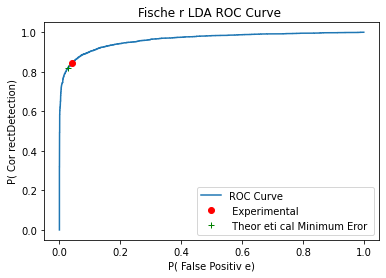

In [13]:


# Pa rtC
#simple f u n ctionto g eta v e rag eofalis t
def get_average(list):
    return sum( list)/ len(list)

# calculate muproj e ction s
mu0proj = np.transpose(np.array([get_average(r0[:, 0]), get_average(r0[:, 1]), get_average(r0[:, 2])]))
mu1proj = np.transpose(np.array([get_average(r1[:, 0]), get_average(r1[:, 1]), get_average(r1[:, 2])]))# calculate covaria nceproj e ction s
sigma0proj = np.cov(r0, rowvar=False)
sigma1proj = np.cov(r1, rowvar=False)
# calculate b e twe ensc att e r and with insc att e r
Sb = (mu0proj - mu1proj)* np.transpose (mu0proj - mu1proj)
Sw = sigma0proj + sigma1proj
# g eteig e n v e cto rsand eig e n val u esfrom Swˆ-1 * Sb
w, v = np.linalg.eig(np.linalg.inv(Sw) * Sb)
max_eigen_index = 0
# fin d ind e xof maximum eig e n val u e
for i in range(0, len (w)):
    if w[i] == max(w) :
        max_eigen_index = i
# assig n wLDAto cor r e cteig e n v e cto r and calculate LDA for 2 distrib ution s
# Note : for some r eason numpy hasb othth e wLDA andth e d ataal r ead ytranspos e dsothis fix # formul a
wLDA = v[:, max_eigen_index]
yLDA0 = np.matmul(wLDA, r0.T)
yLDA1 = np.matmul(wLDA, r1.T)
totalLDA = list(yLDA0) + list(yLDA1)
false_positive =[]
true_positive =[]
prob_error =[]
gamma_values =[]
# us e same logic asa bov eto make d e cisio n s
for i in sorted(totalLDA):
    fp = len([ j for j in yLDA0 if j >=i ])/ N0
    tp = len([ j for j in yLDA1 if j >=i ])/ N1
    false_positive.append(fp)
    true_positive.append(tp)
    gamma_values.append(i)
    prob_error.append(fp *p0 + (1 - tp)* p1)

minimum_error = min( prob_error)
minimum_index = 0
for i in range(0, len(prob_error)) :
    if prob_error [i] == minimum_error :
        minimum_index = i
        break

print('PartC')
print('Experimental Gamma ')
print(gamma_values[minimum_index])
print('Experimental min_error ')
print (min( prob_error))
print('Theor eti cal Eror ')
theo_fp = len([ j for j in yLDA0 if j >=(p1/p0) ])/ N0
theo_tp = len([ j for j in yLDA1 if j >=(p1/p0) ])/ N1
print(theo_fp *p0 + (1- theo_tp)* p1)

# plotd ata
plt.figure(3)
plt.plot(false_positive,true_positive,label= 'ROC Curve ')
plt.plot(false_positive [minimum_index],true_positive [minimum_index], 'ro',label= ' Experimental ')
plt.plot(theo_fp, theo_tp, 'g+',label= ' Theor eti cal Minimum Eror ')
plt.title('Fische r LDA ROC Curve ')
plt.ylabel('P( Cor rectDetection)')
plt.xlabel('P( False Positiv e)')
plt.legend()
plt.show()

In [ ]:

2 Appendix B
import random
import numpy as np
import ma tplotlib.pyplot as plt
fromsc ipy.stats import multivar iate normal
N = 10000
p = [.2,.2 5,.2 5,.3]
N samples =[0, 0, 0, 0]
# assig nth e numberofsample s
for i in range(0, N) :
randnum = random. random()
if randnum < p[0] :
N samples[0] = N samples[0] + 1
e lif randnum < p[0] + p[1] :
N samples[1] = N samples[1] + 1
e lif randnum < p[0] + p[1] + p[2] :
N samples[2] = N samples[2] + 1
el se :
N samples[3] = N samples[3] + 1
#cr e ateth e mus andsigma s
mu =[[ 0, 1],[3, 1],[6, 1],[9, 1]]
sigma =[[[2, 0],[0, 2]],[[ 4, 0],[0, 4]],[[ 6, 0],[0, 6]],[[ 8, 0],[0, 8]]]
r =[]
lossmatrix =[[ 0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]]
#cr e ate d atapoints in eac h distrib ution
for i in range(0, 4):
12
r.append (np.random. multivariate_normal (mu[i], sigma [i], N samples [i ]))
# plotdistrib ution s
plt.figure(0)
plt.scatter(r[0][:, 0], r[0][:, 1],label= ' Class0 ')
plt.scatter(r[1][:, 0], r[1][:, 1], c= ' r ',label= ' Class1 ')
plt.scatter(r[2][:, 0], r[2][:, 1], c= 'g ',label= ' Class2 ')
plt.scatter(r[3][:, 0], r[3][:, 1], c= 'y ',label= ' Class3 ')
plt.legend()
plt.title('True ClassLabels ')
plt.xlabel('X ')
plt.ylabel('Y ')
plt.show()
#cr e ate lambda matrix
lambda matrix =[[ 0, 1, 1, 1],[1, 0, 1, 1],[1, 1, 0, 1],[1, 1, 1, 0]]
plt.figure(1)
# g etris k :actsasth e ris k f u n ction R( aij x)r etu r nse xpe cte d ris k foragiv ensele ction, def g etris k(i, x, lambda mat):
t otal= 0
for j in range(0, 4):
t otal=total+ lambda mat [i][j] * p[ j] * multivar iate normal.pdf(x, mu[ j], sigma[j ])
returntota l
# get MAP : makes d e cisio nsforalld atapoints inap rovid e d g aus sian distrib ution giv ena# listsof cor r e ctl y andin cor r e ctl y d e cid e dpoints
def get MAP(gauss, lambda matrix):
cor r e ct=[]
i n cor r e ct=[]
for i in r[gauss] :
choi ce = np.argmin([ g etris k(0,i, lambda matrix), g etris k(1,i, lambda matrix), gif choi ce == gauss :
cor r ect.append(i)
else :
i n cor r ect.append(i)
lossmatrix[gauss][choi ce] = lossmatrix[gauss][choi ce] + 1
cor r e ctxs=[]
cor r e ctys=[]
for i in cor r e ct:
cor r e ctx s.append(i[0 ])
cor r e cty s.append(i[1 ])
i n cor r e ctxs=[]
i n cor r e ctys=[]
for i inin cor r e ct:
i n cor r e ctx s.append(i[0 ])
i n cor r e cty s.append(i[1 ])
return[cor r e ctxs, cor r e ctys],[incor r e ctxs,in cor r e ctys]
13
# plotsth e d ata foralldistrib ution s
cor r e ct,in cor r e ct= get MAP(0, lambda matrix)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 'o ',label= ' Cor rectClass0 ')
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 'o ',label= ' In cor r e ctClass0 ')
cor r e ct,in cor r e ct= get MAP(1, lambda matrix)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 'v ',label= ' Cor rectClass1 ')
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 'v ',label= ' In cor r e ctClass1 ')
cor r e ct,in cor r e ct= get MAP(2, lambda matrix)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 's',label= ' Cor rectClass2 ')
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 's',label= ' In cor r e ctClass2 ')
cor r e ct,in cor r e ct= get MAP(3, lambda matrix)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 'P ',label= ' Cor rectClass3 ')
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 'P ',label= ' In cor r e ctClass4 ')
plt.legend()
plt.title('Vi sual Representat ion of MAP Cl assific ation for 0-1 Lambda Matrix ')
plt.xlabel('X ')
plt.ylabel('Y ')
plt.show()
# calculatetotallossfrom lossmatrix
t otalloss= 0
for i in range(0, 4):
for j in range(0, 4):
i fi!= j :
t otalloss=totalloss+ lossmatrix [i][j]
print(t otalloss/N)
# calculate con f u sio n matrix asr atios
for i in range(0, 4):
lossmatrix [i] =[x / N samples [i] for x in lossmatrix [i]]
print(lossmatrix)
# Pa rtB
#cr e ate new lambda matrix
lambda matrix b =[[ 0, 1, 2, 3],[1, 0, 1, 2],[2, 1, 0, 1],[3, 2, 1, 0]]
lossmatrix =[[ 0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]]
# plotnew d ata us ing get MAP f u n ctionabov e
plt.figure(2)
cor r e ct,in cor r e ct= get MAP(0, lambda matrix b)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 'o ',label= ' Cor rectClass0 ')
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 'o ',label= ' In cor r e ctClass0 ')
cor r e ct,in cor r e ct= get MAP(1, lambda matrix b)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 'v ',label= ' Cor rectClass1 ')
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 'v ',label= ' In cor r e ctClass1 ')
cor r e ct,in cor r e ct= get MAP(2, lambda matrix b)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 's',label= ' Cor rectClass2 ')
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 's',label= ' In cor r e ctClass2 ')
cor r e ct,in cor r e ct= get MAP(3, lambda matrix b)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 'P ',label= ' Cor rectClass3 ')
14
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 'P ',label= ' In cor r e ctClass4 ')
plt.legend()
plt.title('Vi sual Representat ion of MAP Cl assific ation for Modified Lambda Matrix ')
plt.xlabel('X ')
plt.ylabel('Y ')
plt.show()
# calculatetotallos s
t otalloss= 0
for i in range(0, 4):
for j in range(0, 4):
i fi!= j :
t otalloss=totalloss+ lossmatrix [i][j]
print(t otalloss/N)
# calculate con f u sio n matrix from lossmatr ix
For I in range(0, 4):
lossmatrix [i] =[x / N samples [i] for x in lossmatrix [i]]
print(lossmatrix)
15



In [ ]:
N0_discriminant  =[]
N1_discriminant =[]
# calculates discr imi nanscor esforalld atapoints in eac h d ata distrib ution
for j in range(0, N0):
    N0_discriminant.append(multivariate_normal.pdf(r0[j], mu1, sigma1)/multivariate_normal)
for j in range(0, N1):
    N1_discriminant.append(multivariate_normal.pdf(r1[j], mu1, sigma1)/multivariate_normal) # CUT OFF
    
false_positive =[]
true_positive =[]
prob_error =[]
gamma_values =[]

full_discriminant= N0_discriminant + N1_discriminant
full_discriminant.append(0)

# Inplac eofte sti n g val u esfrom 0toin fin ity whichis impos sible, Ite stfor val u esb e twe 8
#ac ros sth e two discr imi nants cor e lists(p lusa0 valu e), soin eac h loopone new val u ei# b e g in >= 0 andar e e v e ntually <=th e maximum value
for i in sorted(full_discriminant):
fp = len([ j for j in N0_discriminant if j >=i ])/ N0
tp = len([ j for j in N1_discriminant if j >=i ])/ N1

false_positive.append(fp)
true_positive.append(tp)    
gamma_values.append(i)
prob_error.append(fp *p0 + (1 - tp)* p1)

# g etsth e minimum_error and ind e xofth e minimum_error(toplott h epointwi th)
minimum_error = min( prob_error)
minimum_index = 0
for i in range(0, len(prob_error)) :
    if prob_error [i] == minimum_error:
        minimum_index = i
        break

print('PartA')
print('Experimental Gamma ')
print(gamma_values [minimum index ])
print('Experimental min_error ')
print (min( prob_error))
print('Theor eti cal Eror ')

theo_fp = len([ j for j in N0_discriminant if j >=(p1/p0) ])/ N0
theo_tp = len([ j for j in N1_discriminant if j >=(p1/p0) ])/ N1

print(theo_fp *p0 + (1- theo_tp)* p1)

# plott h e d ata wi thth e twoad d itional d atapoints
plt.figure(1)
plt.plot(false_positive,true_positive,label= 'ROC Curve ')
plt.plot(false_positive [minimum index],tr u e_positive [minimum index], ' ro ',label= ' Experimental plt.plot(theo_fp, theo_tp, 'g+ ',label= ' Theor eti cal Minimum Eror ')
plt.title('Minimum Expected Risk ROC Curve ')
plt.ylabel('P( Cor rectDetection)')
plt.xlabel('P( False Positiv e)')
plt.legend()
plt.show()

# Pa rtB :
#id e ntity matrix us ed for sigma
sigma_nb = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1] ])
N0_discriminant =[]
N1_discriminant =[]
# calculati n g discr imi nants cor esasa bov e
for j in range(0, N0):
N0_discriminant.append(multivariate_normal.pdf(r0[j], mu1, sigma_nb)/multivariate_normal 9
for j in range(0, N1):
N1_discriminant.append(multivariate_normal.pdf(r1[j], mu1, sigma_nb)/multivariate_normal false_positive =[]
true_positive =[]
prob_error =[]
gamma_values =[]
full_discriminant= N0_discriminant + N1_discriminant
full_discriminant.append(0)
# d e cidin g forallpos sible gammas us ingth e same logic aspartA
for i in sorted(full_discriminant):
fp = len([ j for j in N0_discriminant if j >=i ])/ N0
tp = len([ j for j in N1_discriminant if j >=i ])/ N1
false_positive.append(fp)
true_positive.append(tp)
gamma_values.append(i)
prob_error.append(fp *p0 + (1 - tp)* p1)
minimum_error = min( prob_error)
minimum index = 0
for i in range(0, len(prob_error)) :
if prob_error [i] == minimum_error :
minimum index = i
break
print('PartB ')
print('Experimental Gamma ')
print(gamma_values [minimum index ])
print('Experimental min_error ')
print (min( prob_error))
print('Theor eti cal Eror ')
theo_fp = len([ j for j in N0_discriminant if j >=(p1/p0) ])/ N0
theo_tp = len([ j for j in N1_discriminant if j >=(p1/p0) ])/ N1
print(theo_fp *p0 + (1- theo_tp)* p1)
# plott h e d ata
plt.figure(2)
plt.plot(false_positive,true_positive,label= 'ROC Curve ')
plt.plot(false_positive [minimum index],tr u e_positive [minimum index], ' ro ',label= ' Experimental plt.plot(theo_fp, theo_tp, 'g+ ',label= ' Theor eti cal Minimum Eror ')
plt.title('Naive Bayesian ROC Curve ')
plt.ylabel('P( Cor rectDetection)')
plt.xlabel('P( False Positiv e)')
plt.legend()
plt.show()
# Pa rtC
#simple f u n ctionto g eta v e rag eofalis t
10
def get average(lis t):
return sum( lis t)/ len(lis t)
# calculate muproj e ction s
mu0proj = np.transpose (np.array([ get average(r0[:, 0 ]), get average(r0[:, 1 ]), get average(mu1proj = np.transpose (np.array([ get average([:, 0 ]), get average(r1[:, 1 ]), get average(# calculate covaria nceproj e ction s
sigma0proj = np.cov(r0, rowvar=False)
sigma1proj = np.cov(r1, rowvar=False)
# calculate b e twe ensc att e r and with insc att e r
Sb = (mu0proj - mu1proj)* np.transpose (mu0proj - mu1proj)
Sw = sigma0proj + sigma1proj
# g eteig e n v e cto rsand eig e n val u esfrom Swˆ-1 * Sb
w, v = np.linal g.eig (np.linal g.inv (Sw) * Sb)
max eigen index = 0
# fin d ind e xof maximum eig e n val u e
for i in range(0, len (w)):
if w[i] == max(w) :
max eigen index = i
# assig n wLDAto cor r e cteig e n v e cto r and calculate LDA for 2 distrib ution s
# Note : for some r eason numpy hasb othth e wLDA andth e d ataal r ead ytranspos e dsothis fix # formul a
wLDA = v[:, max eigen index]
yLDA0 = np.matmul(wLDA, r0.T)
yLDA1 = np.matmul(wLDA, r1.T)
totalLDA = list(yLDA0) + list(yLDA1)
false_positive =[]
true_positive =[]
prob_error =[]
gamma_values =[]
# us e same logic asa bov eto make d e cisio n s
for i in sorted(totalLDA):
fp = len([ j for j in yLDA0if j >=i ])/ N0
tp = len([ j for j in yLDA1if j >=i ])/ N1
false_positive.append(fp)
true_positive.append(tp)
gamma_values.append(i)
prob_error.append(fp *p0 + (1 - tp)* p1)
print('PartC')
11
print('Experimental Gamma ')
print(gamma_values [minimum index ])
print('Experimental min_error ')
print (min( prob_error))
print('Theor eti cal Eror ')
theo_fp = len([ j for j in yLDA0if j >=(p1/p0) ])/ N0
theo_tp = len([ j for j in yLDA1if j >=(p1/p0) ])/ N1
print(theo_fp *p0 + (1- theo_tp)* p1)
# plotd ata
plt.figure(3)
plt.plot(false_positive,true_positive,label= 'ROC Curve ')
plt.plot(false_positive [minimum index],tr u e_positive [minimum index], ' ro ',label= ' Experimental plt.plot(theo_fp, theo_tp, 'g+ ',label= ' Theor eti cal Minimum Eror ')
plt.title('Fische r LDA ROC Curve ')
plt.ylabel('P( Cor rectDetection)')
plt.xlabel('P( False Positiv e)')
plt.legend()
plt.show()
2 Appendix B
import random
import numpy as np
import ma tplotlib.pyplot as plt
fromsc ipy.stats import multivar iate normal
N = 10000
p = [.2,.2 5,.2 5,.3]
N samples =[0, 0, 0, 0]
# assig nth e numberofsample s
for i in range(0, N) :
randnum = random. random()
if randnum < p[0] :
N samples[0] = N samples[0] + 1
e lif randnum < p[0] + p[1] :
N samples[1] = N samples[1] + 1
e lif randnum < p[0] + p[1] + p[2] :
N samples[2] = N samples[2] + 1
el se :
N samples[3] = N samples[3] + 1
#cr e ateth e mus andsigma s
mu =[[ 0, 1],[3, 1],[6, 1],[9, 1]]
sigma =[[[2, 0],[0, 2]],[[ 4, 0],[0, 4]],[[ 6, 0],[0, 6]],[[ 8, 0],[0, 8]]]
r =[]
lossmatrix =[[ 0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]]
#cr e ate d atapoints in eac h distrib ution
for i in range(0, 4):
12
r.append (np.random. multivariate_normal (mu[i], sigma [i], N samples [i ]))
# plotdistrib ution s
plt.figure(0)
plt.scatter(r[0][:, 0], r[0][:, 1],label= ' Class0 ')
plt.scatter(r[1][:, 0], r[1][:, 1], c= ' r ',label= ' Class1 ')
plt.scatter(r[2][:, 0], r[2][:, 1], c= 'g ',label= ' Class2 ')
plt.scatter(r[3][:, 0], r[3][:, 1], c= 'y ',label= ' Class3 ')
plt.legend()
plt.title('True ClassLabels ')
plt.xlabel('X ')
plt.ylabel('Y ')
plt.show()
#cr e ate lambda matrix
lambda matrix =[[ 0, 1, 1, 1],[1, 0, 1, 1],[1, 1, 0, 1],[1, 1, 1, 0]]
plt.figure(1)
# g etris k :actsasth e ris k f u n ction R( aij x)r etu r nse xpe cte d ris k foragiv ensele ction, def g etris k(i, x, lambda mat):
t otal= 0
for j in range(0, 4):
t otal=total+ lambda mat [i][j] * p[ j] * multivar iate normal.pdf(x, mu[ j], sigma[j ])
returntota l
# get MAP : makes d e cisio nsforalld atapoints inap rovid e d g aus sian distrib ution giv ena# listsof cor r e ctl y andin cor r e ctl y d e cid e dpoints
def get MAP(gauss, lambda matrix):
cor r e ct=[]
i n cor r e ct=[]
for i in r[gauss] :
choi ce = np.argmin([ g etris k(0,i, lambda matrix), g etris k(1,i, lambda matrix), gif choi ce == gauss :
cor r ect.append(i)
else :
i n cor r ect.append(i)
lossmatrix[gauss][choi ce] = lossmatrix[gauss][choi ce] + 1
cor r e ctxs=[]
cor r e ctys=[]
for i in cor r e ct:
cor r e ctx s.append(i[0 ])
cor r e cty s.append(i[1 ])
i n cor r e ctxs=[]
i n cor r e ctys=[]
for i inin cor r e ct:
i n cor r e ctx s.append(i[0 ])
i n cor r e cty s.append(i[1 ])
return[cor r e ctxs, cor r e ctys],[incor r e ctxs,in cor r e ctys]
13
# plotsth e d ata foralldistrib ution s
cor r e ct,in cor r e ct= get MAP(0, lambda matrix)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 'o ',label= ' Cor rectClass0 ')
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 'o ',label= ' In cor r e ctClass0 ')
cor r e ct,in cor r e ct= get MAP(1, lambda matrix)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 'v ',label= ' Cor rectClass1 ')
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 'v ',label= ' In cor r e ctClass1 ')
cor r e ct,in cor r e ct= get MAP(2, lambda matrix)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 's',label= ' Cor rectClass2 ')
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 's',label= ' In cor r e ctClass2 ')
cor r e ct,in cor r e ct= get MAP(3, lambda matrix)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 'P ',label= ' Cor rectClass3 ')
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 'P ',label= ' In cor r e ctClass4 ')
plt.legend()
plt.title('Vi sual Representat ion of MAP Cl assific ation for 0-1 Lambda Matrix ')
plt.xlabel('X ')
plt.ylabel('Y ')
plt.show()
# calculatetotallossfrom lossmatrix
t otalloss= 0
for i in range(0, 4):
for j in range(0, 4):
i fi!= j :
t otalloss=totalloss+ lossmatrix [i][j]
print(t otalloss/N)
# calculate con f u sio n matrix asr atios
for i in range(0, 4):
lossmatrix [i] =[x / N samples [i] for x in lossmatrix [i]]
print(lossmatrix)
# Pa rtB
#cr e ate new lambda matrix
lambda matrix b =[[ 0, 1, 2, 3],[1, 0, 1, 2],[2, 1, 0, 1],[3, 2, 1, 0]]
lossmatrix =[[ 0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]]
# plotnew d ata us ing get MAP f u n ctionabov e
plt.figure(2)
cor r e ct,in cor r e ct= get MAP(0, lambda matrix b)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 'o ',label= ' Cor rectClass0 ')
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 'o ',label= ' In cor r e ctClass0 ')
cor r e ct,in cor r e ct= get MAP(1, lambda matrix b)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 'v ',label= ' Cor rectClass1 ')
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 'v ',label= ' In cor r e ctClass1 ')
cor r e ct,in cor r e ct= get MAP(2, lambda matrix b)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 's',label= ' Cor rectClass2 ')
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 's',label= ' In cor r e ctClass2 ')
cor r e ct,in cor r e ct= get MAP(3, lambda matrix b)
plt.scatter(cor r e ct[ 0], cor r e ct[ 1], c= 'g ', marker= 'P ',label= ' Cor rectClass3 ')
14
plt.scatter(i n cor r e ct[ 0],in cor r e ct[ 1], c= ' r ', marker= 'P ',label= ' In cor r e ctClass4 ')
plt.legend()
plt.title('Vi sual Representat ion of MAP Cl assific ation for Modified Lambda Matrix ')
plt.xlabel('X ')
plt.ylabel('Y ')
plt.show()
# calculatetotallos s
t otalloss= 0
for i in range(0, 4):
for j in range(0, 4):
i fi!= j :
t otalloss=totalloss+ lossmatrix [i][j]
print(t otalloss/N)
# calculate con f u sio n matrix from lossmatr ix
For I in range(0, 4):
lossmatrix [i] =[x / N samples [i] for x in lossmatrix [i]]
print(lossmatrix)
15


